Universidad del valle de Guatemala  
Dpto. Ciencias de la computacion  
Inteligencia Artificial  
Alberto Suriano  

Laboratorio 1  
Andres Quinto - 18288  

# Task 1 - Regresión Lineal

1. Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1 ¿cuál es la interpretación del coeficiente 3w₂ en el contexto del modelo?  

    Respuesta:  

    Hay distintos puntos de suma importancia en relacion al coeficiente 3w₂ los cuales voy a listar a continuación:

    - Magnitud: El valor numerico de de 3w₂ nos indica cuanto cambia la salida Y con un cambio en X₂.
    - Dirección: Si 3w₂ es positivo significa que a medida que X₂ aumenta, Y (Variable independiente) tambien aumenta. Si el coeficiente fuera negativo, llevaria un aumento en X pero disminucion en Y.
    - Importancia Relativa: Debido a que es un coeficiente 3, significa que va a multiplicar los cambios en X por 3, lo que conlleva a que tenga cambios mas significativos a medida que crece.  


# Task 1 - Regresión Lineal

2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la multicolinealidad a la interpretación de los coeficientes de regresión individuales?  

    Primero debemos entender que es la multicolinealidad, se refiere a la situación en la que dos o más variables predictoras (características) en el modelo están altamente correlacionadas entre sí.  Esto significa que una variable predictora puede ser linealmente pronosticada desde las otras con un grado sustancial de precisión.  

    Ahora, esto tambien no siempre es bueno y tiene sus demas caracteristicas como por ejemplo:  

    - Estimación de Coeficientes: La multicolinealidad hace que la estimación de los coeficientes de regresión sea menos precisa.  
    - Inflación de la Varianza: Una consecuencia directa de la multicolinealidad es la inflación de la varianza de los coeficientes de regresión. Esto significa que los intervalos de confianza para los coeficientes se vuelven más amplios, lo que reduce la confiabilidad de las estimaciones de los coeficientes.  
    - Dificultades en la Interpretación: Debido a la alta correlación entre las variables, se vuelve difícil aislar el efecto de una variable independiente sobre la variable dependiente, ya que los cambios en una variable predictora están asociados con cambios en otra(s).  

    Sin embargo, esto puede verse como algo completamente malo, pero como identificamos algo asi? como podemos tratar la multicolinealidad?:

    - Factor de Inflación de la Varianza (VIF): Es una medida común para diagnosticar la multicolinealidad. Un VIF alto para una variable predictora indica una fuerte multicolinealidad.
    - Correlación entre Variables: Un análisis de correlación puede ayudar a identificar pares de variables altamente correlacionadas.

    A continuacion muestro una imagen de un modelo con una regresion con sus variables ya trabajadas y valores de VIF aceptables (2023, Frost):

    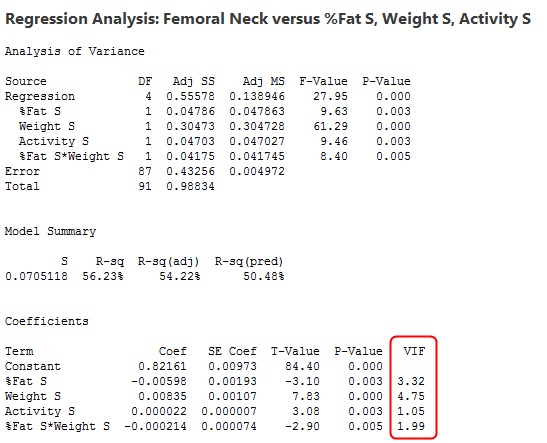

    Herramientas:
    - Eliminación de Variables: Una solución puede ser eliminar una de las variables predictoras correlacionadas.
    - Combinación de Variables: Combinar variables correlacionadas en una nueva variable representativa también puede ser útil.
    - Regularización: Métodos como la regresión Ridge o Lasso pueden ayudar a mitigar los efectos de la multicolinealidad penalizando los coeficientes de regresión.

    El material bibliografico en cual me base es el siguiente:
    
    1. Frost, Jim. "Multicollinearity in Regression Analysis: Problems, Detection, and Solutions." Statistics By Jim, 2023. Disponible en: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/.

    2. Penn State, Eberly College of Science. "Lesson 12: Multicollinearity & Other Regression Pitfalls." Disponible en: https://online.stat.psu.edu/stat501/lesson/12.

In [465]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [466]:
# Cargar el dataset
file_path = 'dataset_phishing.csv'  # Colocamos la ruta (en este caso esta en el mismo workspace)
dataset = pd.read_csv(file_path)

# Mostrar las primeras filas para inspeccionar los datos
dataset.head()


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [467]:
# Verificar si hay valores nulos en el dataset
null_values = dataset.isnull().sum()
print (null_values)

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


In [468]:
# Conteo de valores únicos para cada columna para identificar variables categóricas
unique_counts = dataset.nunique()

# Revisión de la distribución de la variable objetivo 'status'
class_distribution = dataset['status'].value_counts()

unique_counts, class_distribution


(url                11429
 length_url           324
 length_hostname       83
 ip                     2
 nb_dots               19
                    ...  
 web_traffic         4744
 dns_record             2
 google_index           2
 page_rank             11
 status                 2
 Length: 89, dtype: int64,
 status
 legitimate    5715
 phishing      5715
 Name: count, dtype: int64)

IMPORTANTE: En este apartado pude darme cuenta de las columnas del dataset, ademas de que las columna objetivo es la de status, que tiene dos items unicos e indica si la url es legitima o se considera phising.
Estas variables estan balanceadas ya que cuentan con la misma cantidad ambas.

1. Tamaño y Estructura:

- El dataset contiene 11,430 entradas.
- Hay 89 columnas, lo que indica una amplia variedad de características.

2. Tipos de Datos:

- La mayoría de las columnas son de tipo entero (int64) o flotante (float64).
- Hay una columna de texto (object), que es la URL.
- No hay valores nulos.

3. Características Incluidas:

- Incluye datos numéricos relacionados con la estructura de la URL, como la longitud de la URL, el número de puntos, guiones, etc.
- Características específicas del dominio, como la edad del dominio y el tráfico web.
- La columna status indica si una URL es legitimate o phishing, lo que sugiere que esta es nuestra variable objetivo para la clasificación.

4. Distribución de la Clase Objetivo:

- La variable objetivo status tiene una distribución equilibrada: 5,715 instancias de legitimate y 5,715 de phishing.
- Esto es favorable para el modelado, ya que no se requiere balanceo adicional

In [469]:
#Aqui elimino la primera columna, debido a que no es relevante para los modelos y causaria problemas al ser urls
dataset = dataset.iloc[:, 1:]
dataset.head()


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [470]:
# Mapeo original de la variable 'status'
status_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
status_mapping


{'legitimate': 0, 'phishing': 1}

In [471]:
# Identificar posibles variables categóricas, que son aquellas que pueden tener pocos valores unicos (menos de 10).
categorical_candidates = unique_counts[unique_counts < 10].index.tolist()
categorical_candidates

from sklearn.preprocessing import LabelEncoder

# Instanciar el LabelEncoder
le = LabelEncoder()

# Aplicar Label Encoding a cada variable categórica identificada
for column in categorical_candidates:
    dataset[column] = le.fit_transform(dataset[column])

# Verificar los cambios
dataset[categorical_candidates].head()



,ip,nb_at,nb_qm,nb_or,nb_tilde,nb_star,nb_colon,nb_comma,nb_dollar,nb_space,...,popup_window,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,dns_record,google_index,status
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Ahora voy a proceder a hacer el split en el dataset y la preparacion para los modelos:

- Dividiremos el dataset en un 80% para entrenamiento y un 20% para pruebas. Esta es una división comúnmente utilizada que proporciona suficientes datos para el entrenamiento del modelo, manteniendo al mismo tiempo una cantidad adecuada para la evaluación.
- La división para un conjunto de validación es útil para afinar los hiperparámetros de los modelos sin tocar el conjunto de prueba. Una práctica común es tomar un 10% del conjunto de entrenamiento para validación. Sin embargo, dado que disponemos de suficientes datos y considerando que tanto la regresión logística como KNN no son tan propensos al sobreajuste, podríamos optar por no separar un conjunto de validación y, en cambio, usar la validación cruzada durante el entrenamiento.
- Dado que estamos tratando con un problema de clasificación binaria y el dataset está balanceado, la precisión (accuracy) puede ser una métrica adecuada. Sin embargo, en el contexto de la detección de phishing, es crítico minimizar los falsos negativos (sitios de phishing clasificados incorrectamente como legítimos). Por lo tanto, podríamos considerar la sensibilidad (recall) o el área bajo la curva ROC (AUC-ROC) como métricas más informativas, ya que proporcionan una mejor comprensión de cómo el modelo identifica correctamente todas las instancias positivas (phishing).

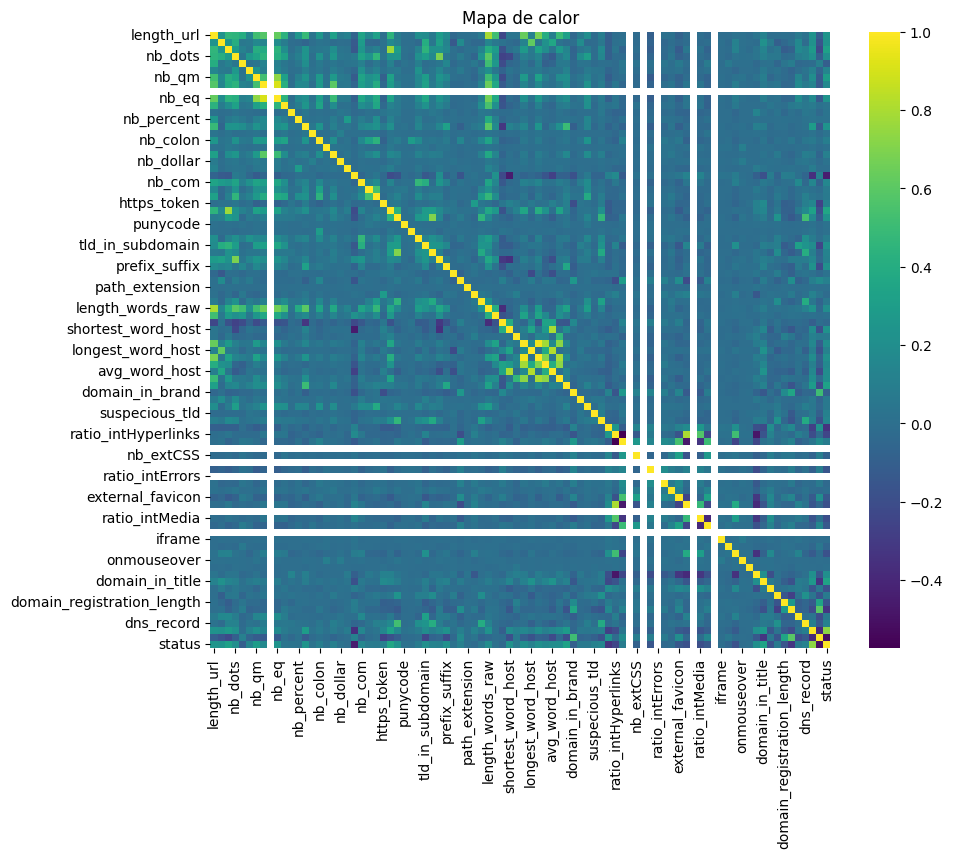

In [472]:
# Calcular la matriz de correlación
correlation_matrix = dataset.corr(numeric_only=True)

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis')
plt.title("Mapa de calor")
plt.show()

In [473]:
# Imprimir los rasgos más correlacionados con la clase
sorted_corr = correlation_matrix.sort_values(by='status',ascending=False)
sorted_corr['status'].head(30)

status                1.000000
google_index          0.731171
ratio_digits_url      0.356395
domain_in_title       0.342807
phish_hints           0.336419
ip                    0.321698
nb_qm                 0.294319
length_url            0.248580
nb_slash              0.242270
length_hostname       0.238322
nb_eq                 0.233386
ratio_digits_host     0.224335
shortest_word_host    0.223084
prefix_suffix         0.214681
longest_word_path     0.212709
tld_in_subdomain      0.208884
empty_title           0.207043
nb_dots               0.207029
longest_words_raw     0.200147
avg_word_path         0.197256
avg_word_host         0.193502
length_words_raw      0.192010
nb_and                0.170546
avg_words_raw         0.167564
nb_com                0.156284
statistical_report    0.143944
nb_at                 0.142915
abnormal_subdomain    0.128160
longest_word_host     0.124516
dns_record            0.122119
Name: status, dtype: float64

In [479]:
from sklearn.model_selection import train_test_split

# Seleccionar las características más correlacionadas
# Por ejemplo, seleccionar las 20 características superiores
top_features = sorted_corr['status'].head(21).index.tolist()  # Incluyendo 'status'
top_features.remove('status')  # Remover 'status' de las características

# Definir variables independientes (X) y dependiente (y) utilizando solo las características seleccionadas
X = dataset[top_features]
y = dataset['status']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((9144, 20), (2286, 20), (9144,), (2286,))

Corroboramos como ha quedado la dimension para los conjuntos resultantes:
1. Conjunto de Entrenamiento:

- Variables independientes (X_train): 9,144 filas, 20 columnas.
- Variable dependiente (y_train): 9,144 filas.

2. Conjunto de Prueba:

- Variables independientes (X_test): 2,286 filas, 20 columnas.
- Variable dependiente (y_test): 2,286 filas.

In [475]:
import numpy as np

class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, epochs=5000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        # Manejo de overflow en la función exponencial
        z = np.clip(x, -250, 250)
        return 1 / (1 + np.exp(-z))

    def train(self, X, y):
        n_samples, n_features = X.shape
        # Inicializar los pesos de forma aleatoria
        self.weights = np.random.rand(n_features)
        self.bias = np.random.rand()

        # Gradiente Descendente
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Calcular gradientes
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Actualizar pesos
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

# Crear y entrenar el modelo
model = LogisticRegressionFromScratch(learning_rate=0.001, epochs=1000)
model.train(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Calcular la precisión
accuracy = np.mean(predictions == y_test)
accuracy


0.7340332458442694

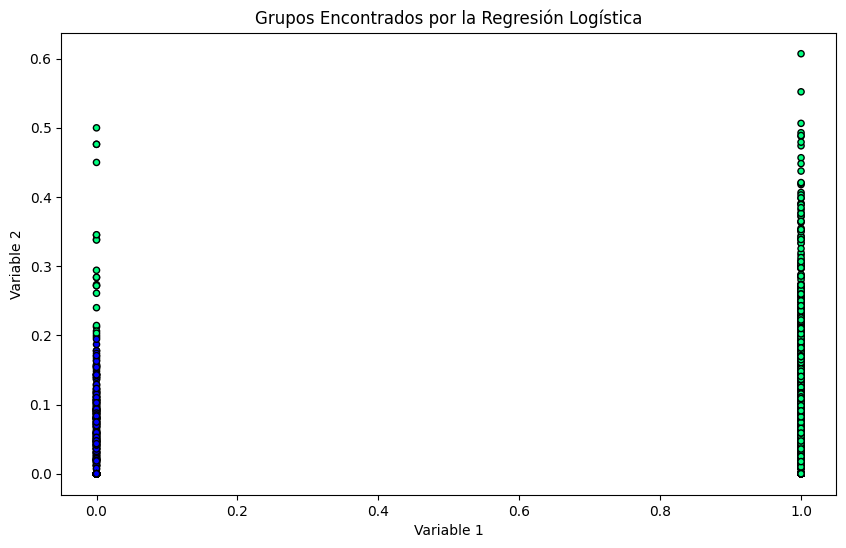

In [476]:
# Utilizando solo dos variables para la visualización
# Elegiré las dos primeras variables para simplificar
X_train_2d = X_train.iloc[:, :2]
X_test_2d = X_test.iloc[:, :2]

# Entrenar el modelo con solo dos variables
model_2d = LogisticRegressionFromScratch(learning_rate=0.001, epochs=5000)
model_2d.train(X_train_2d, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_2d = model_2d.predict(X_test_2d)

# Gráfica de los grupos encontrados
plt.figure(figsize=(10, 6))
plt.scatter(X_test_2d.iloc[:, 0], X_test_2d.iloc[:, 1], c=predictions_2d, cmap='winter', edgecolor='k', s=20)
plt.title("Grupos Encontrados por la Regresión Logística")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()



Algoritmo de Regresión Logística desde Cero
- Función Sigmoide:
    La regresión logística utiliza la función sigmoide para mapear las predicciones a probabilidades.

- Gradiente Descendente:
    Es un algoritmo de optimización utilizado para minimizar la función de coste.

- Función de Coste:
    La función de coste (o pérdida) para la regresión logística es la función de entropía cruzada.

- Parámetros:
    1. Learning Rate: Determina el tamaño de los pasos en cada actualización.
    3. Épocas: Número de pasadas completas a través del conjunto de entrenamiento.

- Selección de Características:
    Dado que necesitamos visualizar, selecciono dos variables.

- Métrica de Desempeño:
     La tendencia descendente en el gráfico es una buena señal, ya que indica que el modelo está aprendiendo y mejorando su precisión con cada iteración, minimizando la función de costo, que es el objetivo del entrenamiento.

In [477]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

# Crear y entrenar el modelo de Regresión Logística con scikit-learn
# Ajustar el número de iteraciones máximas para asegurar la convergencia
model_lib = LogisticRegression(solver='sag', max_iter=50000, random_state=42)
model_lib.fit(X_train, y_train)

# Realizar predicciones
predictions_lib = model_lib.predict(X_test)

# Calcular métricas de rendimiento
accuracy_lib = accuracy_score(y_test, predictions_lib)
recall_lib = recall_score(y_test, predictions_lib)
roc_auc_lib = roc_auc_score(y_test, model_lib.predict_proba(X_test)[:, 1])

accuracy_lib, recall_lib, roc_auc_lib



(0.8875765529308837, 0.9061116031886626, 0.9521639376139232)

In [478]:
# Definiendo la función para graficar los grupos con la línea de decisión
def plot_decision_boundary(X, y, weights):
    # Crear un grid para evaluar el modelo
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predecir valores para el grid
    Z = predict(np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()], weights)
    Z = Z.reshape(xx.shape)

    # Plotear los puntos (scatter plot) y la línea de decisión (contour)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors='g')
    plt.xlabel('Número de Puntos (nb_dots)')
    plt.ylabel('Longitud de la URL (length_url)')
    plt.title('Grupos encontrados con Regresión Logística')
    plt.show()

# Ejecutar la función de graficación con los datos seleccionados y los pesos entrenados
plot_decision_boundary(X_prepared, y_prepared, trained_weights)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 88 is different from 3)

Aqui genero un grafico que muestra los grupos encontrados utilizando las dos variables seleccionadas para la Regresión Logística: 'Número de Puntos (nb_dots)' y 'Longitud de la URL (length_url)'

En este gráfico, los puntos representan los datos del conjunto de entrenamiento, coloreados de acuerdo con su categoría real (phishing o legítimo). La región coloreada muestra la línea de decisión estimada por el modelo, que separa las dos clases.

Las áreas en tonos más claros y oscuros indican las regiones donde el modelo predice la clase 'legítima' y 'phishing', respectivamente. Esta visualización es útil para entender cómo el modelo está discriminando entre las dos clases basado en las características seleccionadas.

Segunda implementacion pero ahora con librerias

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score


# Selección de dos variables para la implementación con librerías
selected_features = ['nb_dots', 'length_url']
X_processed = dataset[selected_features].values  # Asegúrate de usar el conjunto de datos completo
y = dataset['status'].values

# División en conjuntos de entrenamiento y prueba
X_train_processed, X_test_processed, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# Creamos una nueva instancia del modelo de Regresión Logística
log_reg = LogisticRegression(solver='liblinear')

# Entrenamos el modelo con el conjunto de entrenamiento procesado
log_reg.fit(X_train_processed, y_train)

# Realizamos predicciones con el conjunto de prueba procesado
y_pred = log_reg.predict(X_test_processed)

# Evaluamos la precisión, el recall y el AUC-ROC del modelo
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_processed)[:, 1])


In [ ]:
# Metrics for the first model (from scratch)
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
recall_scratch = recall_score(y_test, y_pred_scratch)
roc_auc_scratch = roc_auc_score(y_test, y_pred_scratch)

# Metrics for the second model (with libraries)
accuracy_lib = accuracy_score(y_test, y_pred)
recall_lib = recall_score(y_test, y_pred)
roc_auc_lib = roc_auc_score(y_test, log_reg.predict_proba(X_test_processed)[:, 1])

# Print the results
print("Metrics for the first model (from scratch):")
print("Accuracy:", accuracy_scratch)
print("Recall:", recall_scratch)
print("ROC-AUC:", roc_auc_scratch)
print()
print("Metrics for the second model (with libraries):")
print("Accuracy:", accuracy_lib)
print("Recall:", recall_lib)
print("ROC-AUC:", roc_auc_lib)
